In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Load Wrist Data Only
# only using the data of the wrist sensor as train and test data set.
joon_data = pd.read_csv('Joon_wrist.csv', header=0)
joon_size = len(joon_data)
boyu_data = pd.read_csv('Boyu_wrist.csv', header=0)
boyu_size = len(boyu_data)


train_data=list()
train_clas=list()
for i in range(joon_size):
    train_data.append(list(joon_data.iloc[i,1:13]))
    train_clas.append(int(joon_data.iloc[i,14:15]['isFall']))


test_data=list()
test_clas=list()
for i in range(boyu_size):
    test_data.append(list(boyu_data.iloc[i,1:13]))
    test_clas.append(int(boyu_data.iloc[i,14:15]['isFall']))

In [7]:
## Load Waist Data Only
# only using the data of the waist sensor as train and test data set.
joon_data = pd.read_csv('Joon_waist.csv', header=0)
joon_size = len(joon_data)
boyu_data = pd.read_csv('Boyu_waist.csv', header=0)
boyu_size = len(boyu_data)


train_data=list()
train_clas=list()
for i in range(joon_size):
    train_data.append(list(joon_data.iloc[i,1:13]))
    train_clas.append(int(joon_data.iloc[i,14:15]['isFall']))


test_data=list()
test_clas=list()
for i in range(boyu_size):
    test_data.append(list(boyu_data.iloc[i,1:13]))
    test_clas.append(int(boyu_data.iloc[i,14:15]['isFall']))

In [13]:
## Load Bath Waist and Wrist Data
# combining the data of the waist and wrist sensor as train and test data set.
joon_waist_data = pd.read_csv('Joon_waist.csv', header=0)
joon_waist_size = len(joon_waist_data)
joon_wrist_data = pd.read_csv('Joon_wrist.csv', header=0)
joon_wrist_size = len(joon_wrist_data)

boyu_waist_data = pd.read_csv('Boyu_waist.csv', header=0)
boyu_waist_size = len(boyu_waist_data)
boyu_wrist_data = pd.read_csv('Boyu_wrist.csv', header=0)
boyu_wrist_size = len(boyu_wrist_data)


train_data=list()
train_clas=list()
for i in range(joon_waist_size):
    base_waist_data = list(joon_waist_data.iloc[i,1:13])
    base_wrist_data = list(joon_wrist_data.iloc[i,1:13])
    isFall = int(joon_waist_data.iloc[i,14:15]['isFall'])
    
    train_data.append(base_waist_data + base_wrist_data)
    train_clas.append(isFall)


test_data=list()
test_clas=list()
for i in range(boyu_waist_size):
    base_waist_data = list(boyu_waist_data.iloc[i,1:13])
    base_wrist_data = list(boyu_wrist_data.iloc[i,1:13])
    isFall = int(boyu_waist_data.iloc[i,14:15]['isFall'])
    
    test_data.append(base_waist_data + base_wrist_data)
    test_clas.append(isFall)

In [14]:
## Train the Model
clf_lin = svm.SVC(kernel='linear').fit(train_data, train_clas)
clf_rbf = svm.SVC(kernel='rbf').fit(train_data, train_clas)
clf_sig = svm.SVC(kernel='sigmoid').fit(train_data, train_clas)

In [15]:
# Test the Model
pred_lin = clf_lin.predict(test_data)
pred_rbf = clf_rbf.predict(test_data)
pred_sig = clf_sig.predict(test_data)

In [16]:
# Result Comparison
relt_lin = sum([1 for i,j in zip(test_clas, pred_lin) if int(i) == int(j)]) / len(test_clas) * 100
relt_rdf = sum([1 for i,j in zip(test_clas, pred_rbf) if int(i) == int(j)]) / len(test_clas) * 100
relt_sig = sum([1 for i,j in zip(test_clas, pred_sig) if int(i) == int(j)]) / len(test_clas) * 100

print('The accuracy of linear SVM: %.2f %%' % relt_lin)
print('The accuracy of rbf    SVM: %.2f %%' % relt_rdf)
print('The accuracy of sigmod SVM: %.2f %%' % relt_sig)

The accuracy of linear SVM: 79.80 %
The accuracy of rbf    SVM: 93.43 %
The accuracy of sigmod SVM: 45.96 %


In [17]:
pred_data = pred_lin

tp = sum([1 for i,j in zip(test_clas, pred_data) if int(i) == int(j) and int(i) == 1])
fn = sum([1 for i,j in zip(test_clas, pred_data) if int(i) != int(j) and int(i) == 1])
fp = sum([1 for i,j in zip(test_clas, pred_data) if int(i) != int(j) and int(i) == 0])
tn = sum([1 for i,j in zip(test_clas, pred_data) if int(i) == int(j) and int(i) == 0])

accuracy = (tp + tn) / (tp + fn + fp + tn)
average_accuracy = (tp / (tp + fn) + tn / (fp + tn)) / 2
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
print(" Accuracy: %.2f\n Average accuracy %.2f\n Precision %.2f\n recall %.2f\n F1-Score %.2f\n"
      % (accuracy, average_accuracy, precision, recall, f1_score))

 Accuracy: 0.80
 Average accuracy 0.73
 Precision 0.81
 recall 0.52
 F1-Score 0.63



In [20]:
for i, j in zip(test_clas, pred_lin):
    if i != j:
        print('%d vs %d' % (i, j))

1 vs 0
1 vs 0
1 vs 0
1 vs 0
1 vs 0
1 vs 0
1 vs 0
1 vs 0
0 vs 1
0 vs 1


In [39]:
L = ['mean_x', 'mean_y', 'mean_z', 'max_x', 'max_y', 'max_z', 'min_x', 'min_y', 'min_z', 'var_x', 'var_y', 'var_z']
df = pd.DataFrame(test_data, columns=L)
df['isFall'] = pred_rbf

In [32]:
L = ['mean_x', 'mean_y', 'mean_z', 'max_x', 'max_y', 'max_z', 'min_x', 'min_y', 'min_z', 'var_x', 'var_y', 'var_z']
df = pd.DataFrame(test_data, columns=L)
df['isFall'] = test_clas

In [40]:
fall_data = df[df['isFall'] == 1]
x_fall = np.array(fall_data['var_x'])
y_fall = np.array(fall_data['var_y'])
z_fall = np.array(fall_data['var_z'])

nonfall_data = df[df['isFall'] == 0]
x_nonfall = np.array(nonfall_data['var_x'])
y_nonfall = np.array(nonfall_data['var_y'])
z_nonfall = np.array(nonfall_data['var_z'])

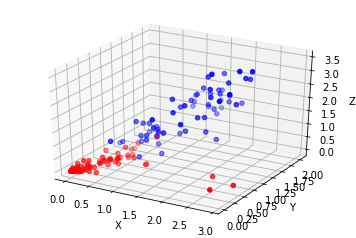

In [41]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_fall, y_fall, z_fall, c='b')
ax.scatter(x_nonfall, y_nonfall, z_nonfall, c='r')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()